### Подключение модулей

In [149]:
import pandas as pd
import numpy as np
import seaborn as sns

In [150]:
import matplotlib.pyplot as plt
%matplotlib inline

In [151]:
import warnings
warnings.filterwarnings('ignore')

In [152]:
import tensorflow as tf
from tensorflow import keras

Целью этого проекта является прогнозирование и анализ цен продажи жилья в США. Требуется построить регрессионную модель для прогнозирования цен на жилье в США на основе различных факторов.


### Загрузка данных

In [153]:
df = pd.read_csv('USA_Housing.csv')

In [154]:
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.4586,5.6829,7.0092,4.0900,23086.8005,1059033.5579,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.6425,6.0029,6.7308,3.0900,40173.0722,1505890.9148,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.0672,5.8659,8.5127,5.1300,36882.1594,1058987.9879,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.2400,7.1882,5.5867,3.2600,34310.2428,1260616.8066,USS Barnett\nFPO AP 44820
4,59982.1972,5.0406,7.8394,4.2300,26354.1095,630943.4893,USNS Raymond\nFPO AE 09386


Данные содержат следующие столбцы:
- __Avg. Area Income__ (Сред. Доход от района): Средний доход жителей города по региону.
- __Avg. Area House Age__ (Сред. Площадь дома): Средний возраст домов в районе.
- __Avg. Area Number of Rooms__ (Сред. Площадь Количество комнат): Среднее количество комнат в домах в том же городе.
- __Avg. Area Number of Bedrooms__ (Сред. Площадь Количество спален): Среднее количество спален в домах в том же городе.
- __Area Population__ (Население региона): Население городского дома, в котором находится.
- __Price__ (Цена): Цена, по которой был продан дом.
- __Address__ (Адрес): Адрес дома.
    

In [155]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [156]:
df.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.0000,5000.0000,5000.0000,5000.0000,5000.0000,5000.0000
mean,68583.1090,5.9772,6.9878,3.9813,36163.5160,1232072.6541
std,10657.9912,0.9915,1.0058,1.2341,9925.6501,353117.6266
min,17796.6312,2.6443,3.2362,2.0000,172.6107,15938.6579
25%,61480.5624,5.3223,6.2993,3.1400,29403.9287,997577.1350
50%,68804.2864,5.9704,7.0029,4.0500,36199.4067,1232669.3780
75%,75783.3387,6.6508,7.6659,4.4900,42861.2908,1471210.2042
max,107701.7484,9.5191,10.7596,6.5000,69621.7134,2469065.5942


In [157]:
pd.set_option('display.float_format', lambda x: '%0.4f' % x)

In [158]:
df.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.0000,5000.0000,5000.0000,5000.0000,5000.0000,5000.0000
mean,68583.1090,5.9772,6.9878,3.9813,36163.5160,1232072.6541
std,10657.9912,0.9915,1.0058,1.2341,9925.6501,353117.6266
min,17796.6312,2.6443,3.2362,2.0000,172.6107,15938.6579
25%,61480.5624,5.3223,6.2993,3.1400,29403.9287,997577.1350
50%,68804.2864,5.9704,7.0029,4.0500,36199.4067,1232669.3780
75%,75783.3387,6.6508,7.6659,4.4900,42861.2908,1471210.2042
max,107701.7484,9.5191,10.7596,6.5000,69621.7134,2469065.5942


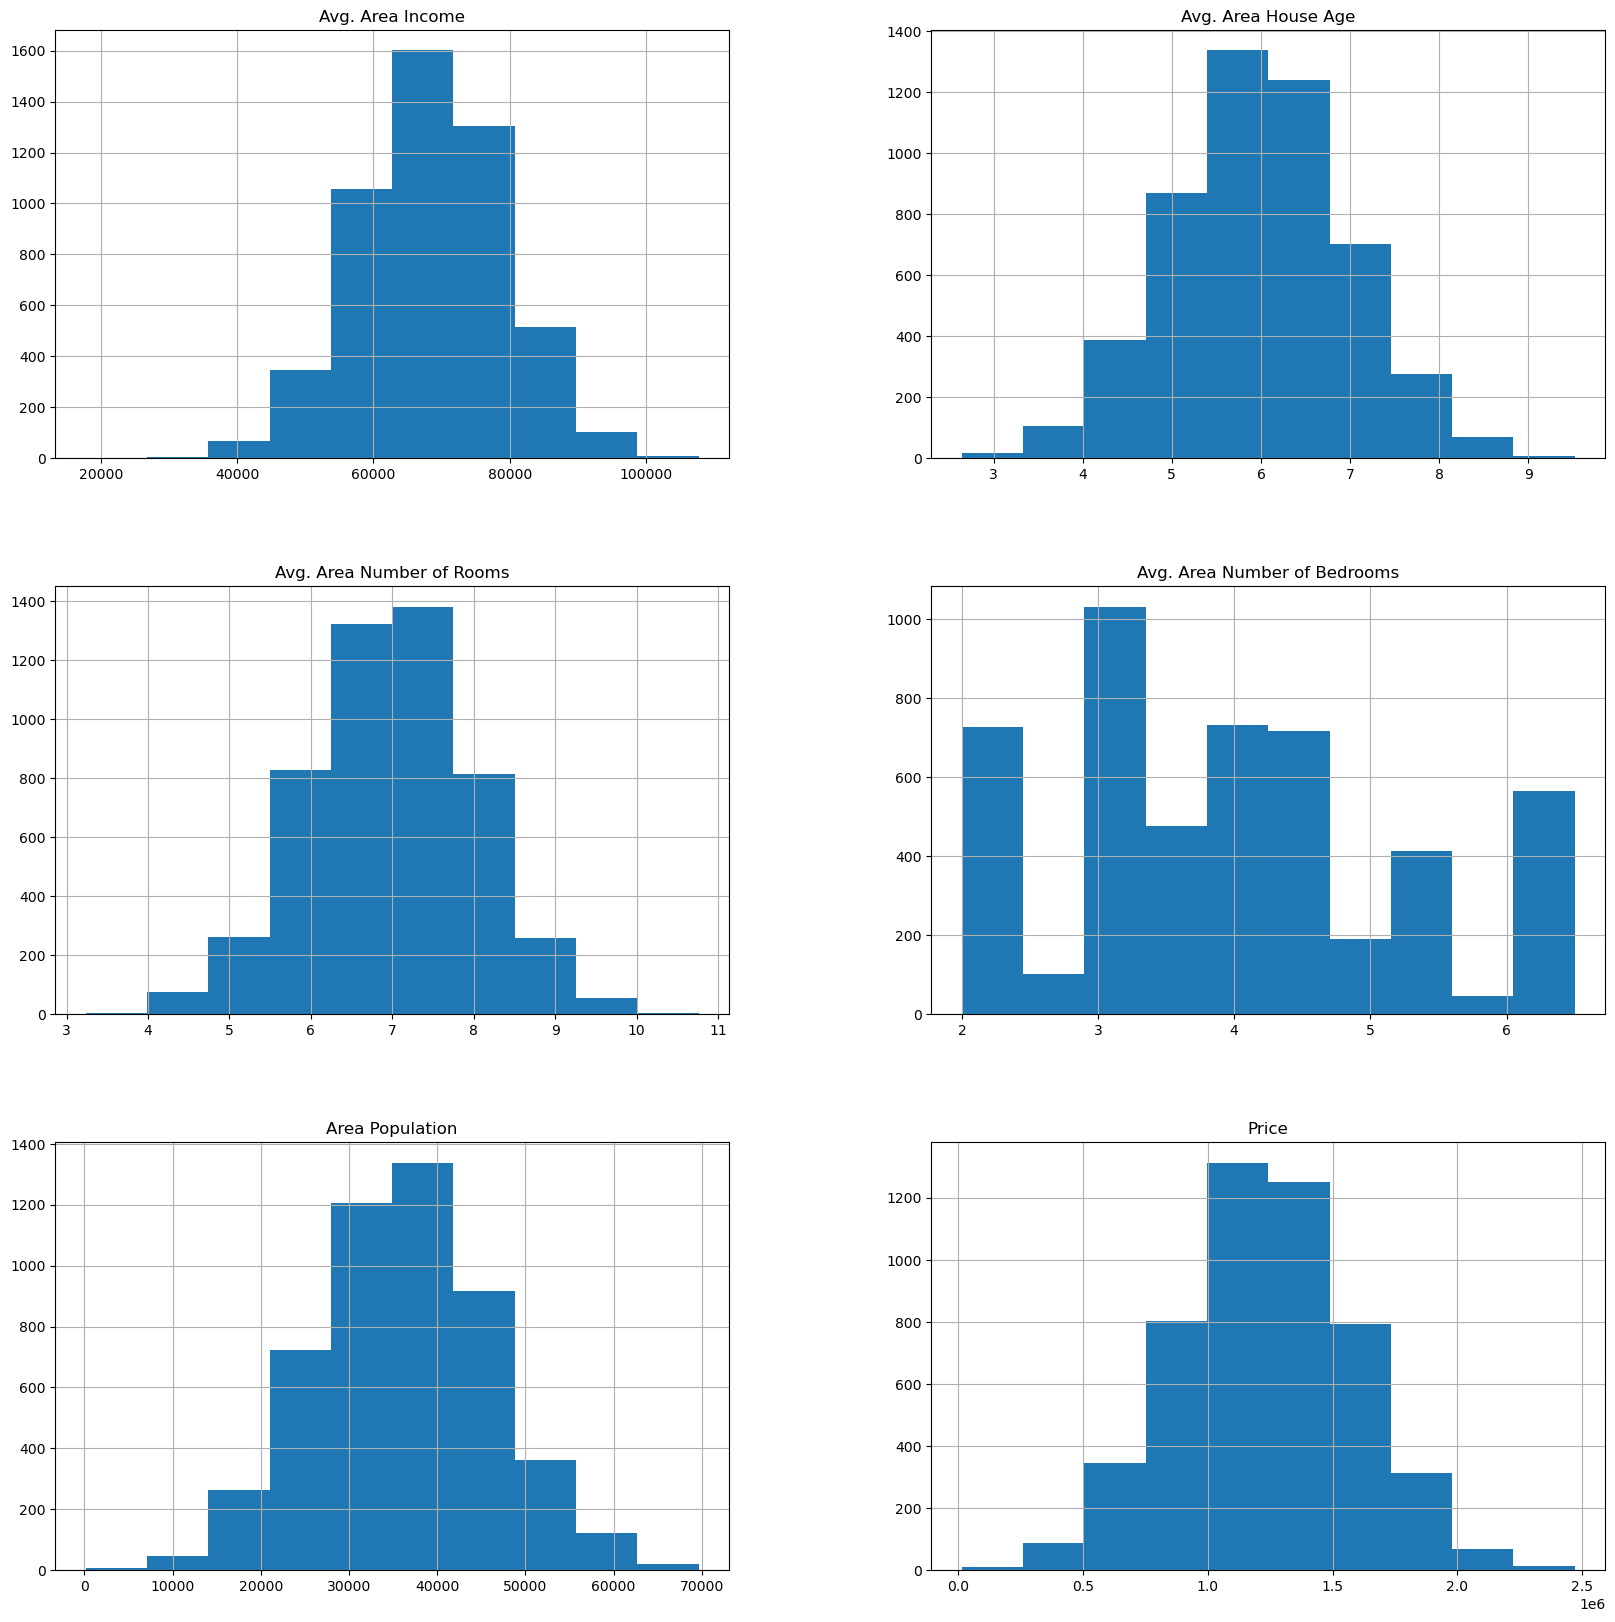

In [159]:
df.hist(figsize=(20,20));

In [ ]:
plt.figure(figsize=(8,6))
sns.pairplot(df)

In [ ]:
sns.distplot(df['Price'])

In [ ]:
sns.regplot(y='Price', x='Avg. Area Income', data=df)

In [ ]:
df[['Avg. Area Income', 'Avg. Area House Age','Avg. Area Number of Rooms','Avg. Area Number of Bedrooms','Area Population', 'Price']].corr()

In [ ]:
sns.heatmap(df[['Avg. Area Income', 'Avg. Area House Age','Avg. Area Number of Rooms','Avg. Area Number of Bedrooms','Area Population', 'Price']].corr(), annot=True)

In [ ]:
df['House Age'] = df['Avg. Area House Age'].apply(int)

In [ ]:
plt.figure(figsize = (12, 6), dpi = 200)
sns.barplot(x = 'House Age', y = 'Price', data = df, ci = None)

In [ ]:
df['Number of Rooms'] = df['Avg. Area Number of Rooms'].apply(int)

In [ ]:
plt.figure(figsize = (12, 6), dpi = 200)
sns.barplot(x = 'Number of Rooms', y = 'Price', data = df, ci = None)

In [ ]:
df['Number of Bedrooms'] = df['Avg. Area Number of Bedrooms'].apply(int)

In [ ]:
plt.figure(figsize = (12, 6), dpi = 200)
sns.barplot(x = 'Number of Bedrooms', y = 'Price', data = df, ci = None)

### Обучение модели линейной регрессии

In [ ]:
df.columns

In [ ]:
X = df[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population']]

In [ ]:
y = df['Price']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Линейная регрессия

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lrm = LinearRegression()
lrm.fit(X_train, y_train)

In [ ]:
lrm.intercept_

In [ ]:
lrm.coef_

In [ ]:
predictions = lrm.predict(X_test)

In [ ]:
predictions

In [ ]:
y_test.round(3)

In [ ]:
plt.scatter(y_test, predictions)

In [ ]:
sns.regplot(x=y_test,y=predictions,line_kws={"color":"black"})

In [ ]:
sns.distplot((y_test - predictions))

### Метрики оценки качества регрессии


Общие показатели оценки для задач регрессии:

**Mean Absolute Error** (MAE Средняя абсолютная ошибка) - это среднее значение абсолютного значения ошибок:

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

**Mean Squared Error** (MSE Среднеквадратическая ошибка) - это среднее значение квадратов ошибок:

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

**Root Mean Squared Error** (RMSE Среднеквадратическая ошибка) - это квадратный корень из среднего квадрата ошибок:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

**Коэффициент детерминации** $R^{2}$

$$R^2 = 1 - \frac{\frac{1}{n}\sum^{n}_{i}{(y - y_{pred})^2}}{\frac{1}{n}\sum^{n}_{i}{(y - \bar{y})^2}}$$

In [ ]:
y_test_values = y_test.values

In [ ]:
# Рассчитаем метрики
mse_lr = mean_squared_error(y_test_values, predictions)
mae_lr = mean_absolute_error(y_test_values, predictions)
r2_lr = r2_score(y_test_values, predictions)

In [ ]:
print(f"MSE линейной регрессии: {mse_lr:.2f}")
print(f"MAE линейной регрессии: {mae_lr:.2f}")
print(f"R² Score линейной регрессии: {r2_lr:.4f}")

In [ ]:
comparison_df = pd.DataFrame({
    'Модель': ['Нейронная сеть', 'XGBoost'],
    'MSE': [mse_nn, mse_xgb],
    'MAE': [mae_nn, mae_xgb],
    'R² Score': [r2_nn, r2_xgb]
})

In [ ]:
from sklearn import metrics

In [ ]:
metrics.mean_absolute_error(y_test, predictions)

In [ ]:
metrics.mean_squared_error(y_test, predictions)

In [ ]:
np.sqrt(metrics.mean_squared_error(y_test, predictions))

In [ ]:
metrics.r2_score(y_test, predictions)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
# Масштабирование признаков
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
def create_nn_model():
    model = Sequential([
        Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)),
        BatchNormalization(),
        Dropout(0.3),
        
        Dense(64, activation='relu'),
        BatchNormalization(),
        Dropout(0.3),
        
        Dense(32, activation='relu'),
        Dropout(0.2),
        
        Dense(16, activation='relu'),
        Dense(1)  # Выходной слой для регрессии
    ])
    
    model.compile(
        optimizer='adam',
        loss='mse',
        metrics=['mae']
    )
    
    return model

In [ ]:
nn_model = create_nn_model()

# Ранняя остановка для предотвращения переобучения
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=20,
    restore_best_weights=True,
    verbose=1
)

# Обучение модели
history = nn_model.fit(
    X_train_scaled, y_train,
    validation_split=0.2,
    epochs=100,
    batch_size=32,
    callbacks=[early_stopping],
    verbose=1
)

In [ ]:
# Прогнозирование на тестовых данных
y_pred_nn = nn_model.predict(X_test_scaled).flatten()

# Оценка модели
mse_nn = mean_squared_error(y_test, y_pred_nn)
mae_nn = mean_absolute_error(y_test, y_pred_nn)
r2_nn = r2_score(y_test, y_pred_nn)

In [ ]:
print("МОДЕЛЬ НЕЙРОННОЙ СЕТИ (TensorFlow/Keras)")

print(f"MSE: {mse_nn:.2f}")
print(f"MAE: {mae_nn:.2f}")
print(f"R² Score: {r2_nn:.4f}")
print("-"*50)

In [ ]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

In [ ]:
# Создание и обучение модели XGBoost
xgb_model = xgb.XGBRegressor(
    n_estimators=200,
    learning_rate=0.05,
    max_depth=5,
    random_state=42,
    n_jobs=-1
)

In [ ]:
# Поиск оптимальных гиперпараметров (опционально, можно закомментировать для скорости)
param_grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [100, 200, 300]
}

In [ ]:
# GridSearchCV (занимает время, можно пропустить)
print("Начинаем поиск оптимальных параметров для XGBoost...")
grid_search = GridSearchCV(
    xgb_model,
    param_grid,
    cv=3,
    scoring='r2',
    n_jobs=-1,
    verbose=0
)
grid_search.fit(X_train_scaled, y_train)

In [ ]:
print(f"Лучшие параметры: {grid_search.best_params_}")
print(f"Лучший R² Score на кросс-валидации: {grid_search.best_score_:.4f}")

In [ ]:
best_xgb_model = grid_search.best_estimator_

# Прогнозирование
y_pred_xgb = best_xgb_model.predict(X_test_scaled)

# Оценка модели
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

In [ ]:

print("МОДЕЛЬ GRADIENT BOOSTING (XGBoost)")

print(f"MSE: {mse_xgb:.2f}")
print(f"MAE: {mae_xgb:.2f}")
print(f"R² Score: {r2_xgb:.4f}")
print("-"*50)

## Вывод

Линейная регрессия показала наилучшие результаты.
R² = 0.9147 - самый высокий.

Нейронная сеть:
R² = 0.9087

Градиентный бустинг немного уступил нейронной сети, но всё же показал хорошее качество (R² = 0.9033).